In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aariyan101/usa-housingcsv")

print("Path to dataset files:", path)

100%|██████████| 363k/363k [00:00<00:00, 808kB/s]

Extracting files...
Path to dataset files: /home/astane/.cache/kagglehub/datasets/aariyan101/usa-housingcsv/versions/1


In [35]:
USAhousing = pd.read_csv('../../data/USA_Housing.csv')

In [38]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [39]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [40]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [42]:
# drop the address column
USAhousing.drop('Address', axis=1, inplace=True)
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


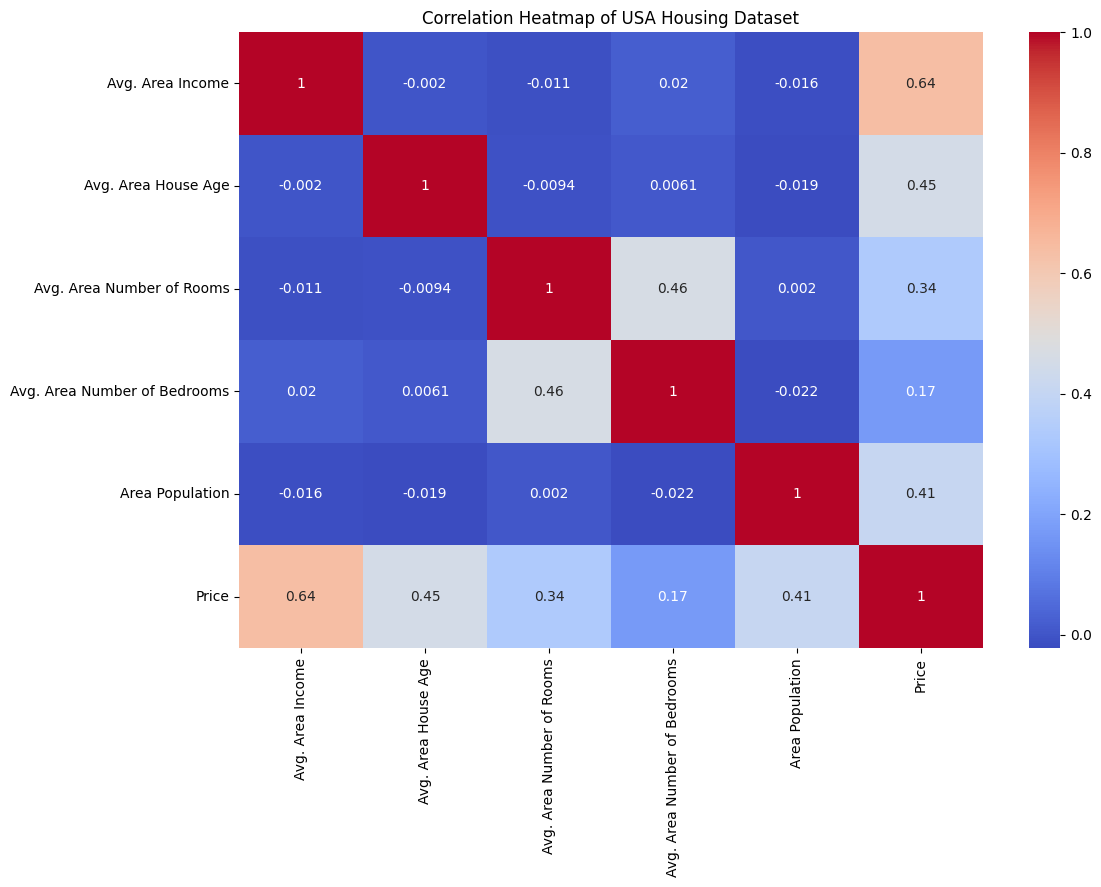

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(USAhousing.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap of USA Housing Dataset')
plt.show()


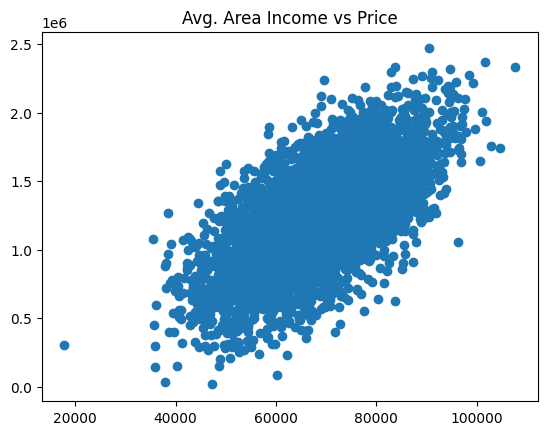

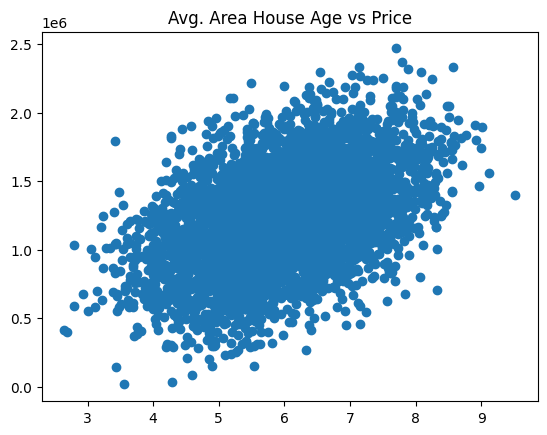

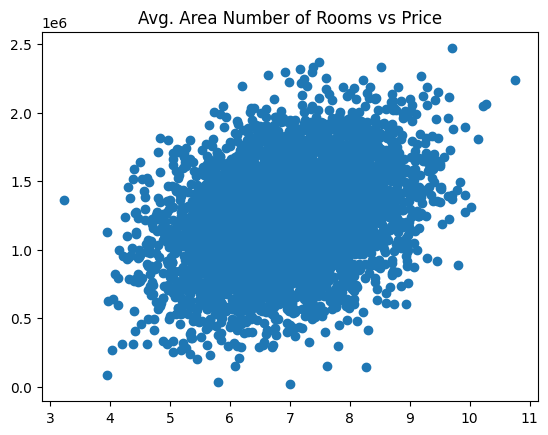

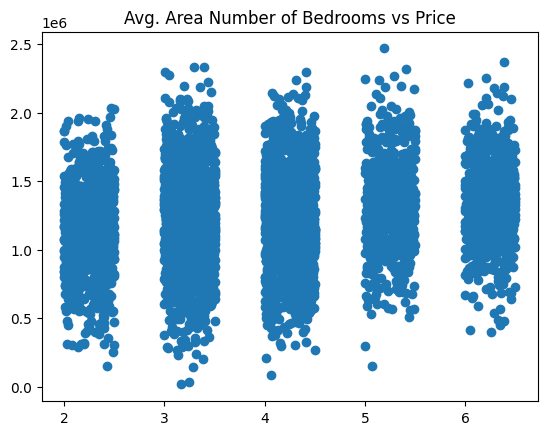

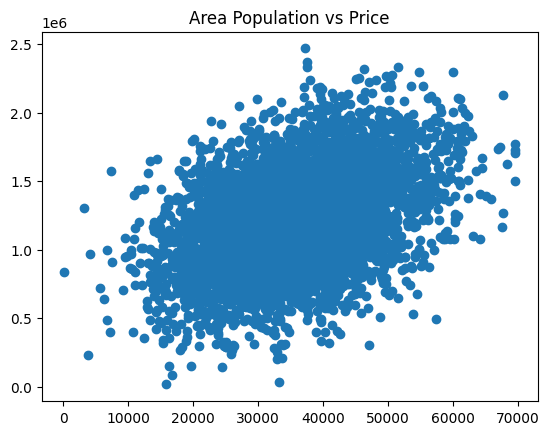

In [49]:
plt.title('Avg. Area Income vs Price')
plt.scatter(USAhousing['Avg. Area Income'], USAhousing['Price'])
plt.show()

plt.title('Avg. Area House Age vs Price')
plt.scatter(USAhousing['Avg. Area House Age'], USAhousing['Price'])
plt.show()

plt.title('Avg. Area Number of Rooms vs Price')
plt.scatter(USAhousing['Avg. Area Number of Rooms'], USAhousing['Price'])
plt.show()

plt.title('Avg. Area Number of Bedrooms vs Price')
plt.scatter(USAhousing['Avg. Area Number of Bedrooms'], USAhousing['Price'])
plt.show()

plt.title('Area Population vs Price')
plt.scatter(USAhousing['Area Population'], USAhousing['Price'])
plt.show()

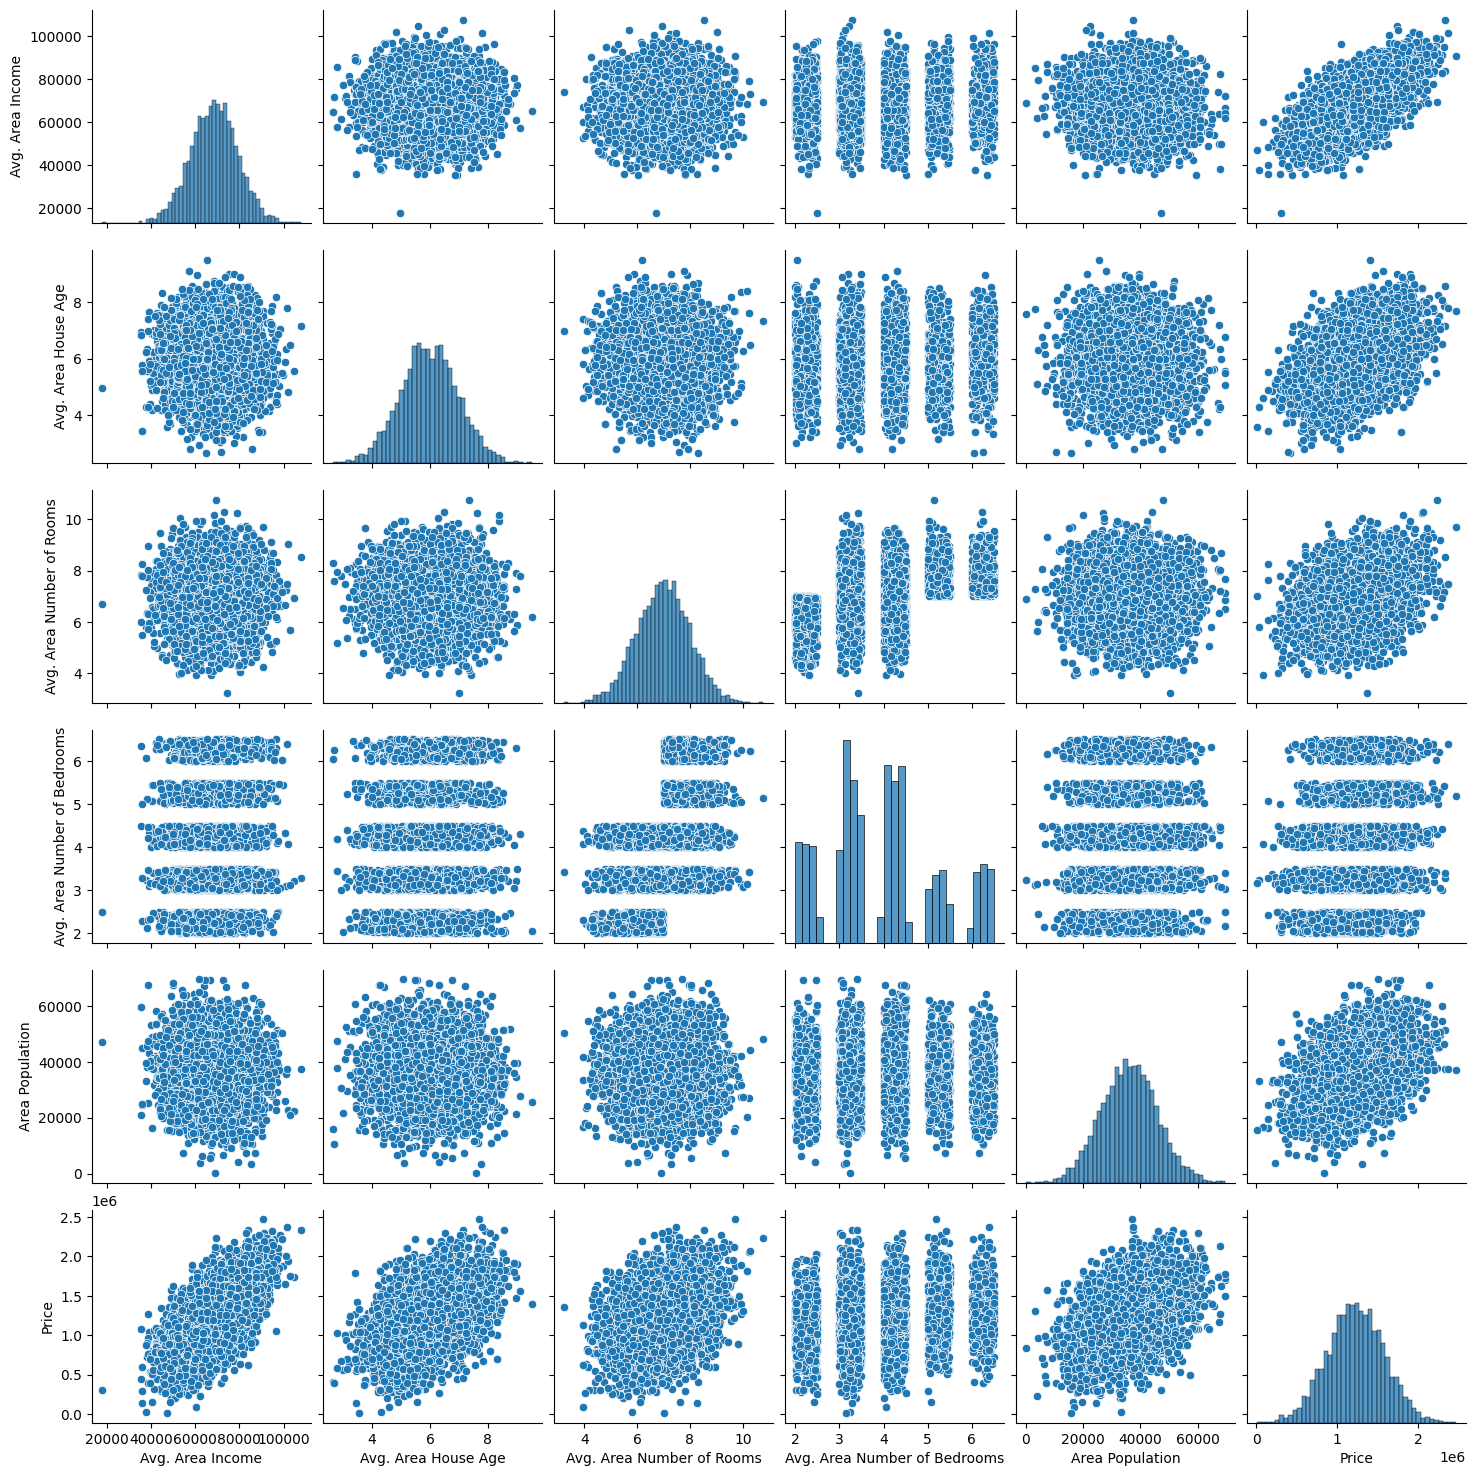

In [55]:
sns.pairplot(USAhousing)
plt.show()

In [56]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)


In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lm = LinearRegression()

In [61]:
lm.fit(X_train,y_train)

LinearRegression()

In [62]:
predictions = lm.predict(X_test)

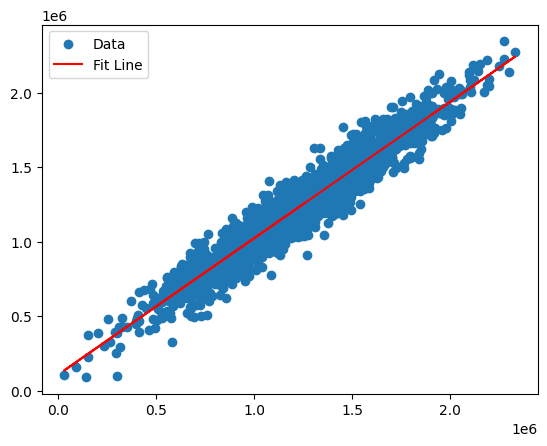

R2 value: 0.9176824009649241


In [78]:
from sklearn.metrics import r2_score

# Fit a line to the scatter plot
plt.scatter(y_test, predictions, label='Data')
m, b = np.polyfit(y_test, predictions, 1)
plt.plot(y_test, m * y_test + b, color='red', label='Fit Line')
plt.legend()
plt.show()

# Calculate and report the R2 value
r2 = r2_score(y_test, predictions)
print("R2 value:", r2)

In [65]:
from sklearn import metrics

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914942
MSE: 10460958907.208977
RMSE: 102278.82922290897


In [69]:
lm.coef_, lm.intercept_

(array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
        1.51504200e+01]),
 -2640159.7968526953)

In [77]:
# print the regression equation
print("Price = {:.2f} + {:.2f} * Avg. Area Income + {:.2f} * Avg. Area House Age + {:.2f} * Avg. Area Number of Rooms + {:.2f} * Avg. Area Number of Bedrooms + {:.2f} * Area Population".format(
    lm.intercept_, lm.coef_[0], lm.coef_[1], lm.coef_[2], lm.coef_[3], lm.coef_[4]))
# Save the model
import joblib
joblib.dump(lm, 'usa_housing_model.pkl')
# Load the model
loaded_model = joblib.load('usa_housing_model.pkl')
# Make predictions with the loaded model
predictions_loaded = loaded_model.predict(X_test)
# Compare predictions
print("Predictions from loaded model:", predictions_loaded[:5])
# Save the model using pickle
import pickle
with open('usa_housing_model.pkl', 'wb') as file:
    pickle.dump(lm, file)
# Load the model using pickle
with open('usa_housing_model.pkl', 'rb') as file:
    loaded_model_pickle = pickle.load(file)
# Make predictions with the loaded model
predictions_loaded_pickle = loaded_model_pickle.predict(X_test)
# Compare predictions
print("Predictions from loaded model (pickle):", predictions_loaded_pickle[:5])

Price = -2640159.80 + 21.53 * Avg. Area Income + 164883.28 * Avg. Area House Age + 122368.68 * Avg. Area Number of Rooms + 2233.80 * Avg. Area Number of Bedrooms + 15.15 * Area Population
Predictions from loaded model: [1260960.70567627  827588.75560329 1742421.24254344  974625.38739893
  998717.84201988]
Predictions from loaded model (pickle): [1260960.70567627  827588.75560329 1742421.24254344  974625.38739893
  998717.84201988]


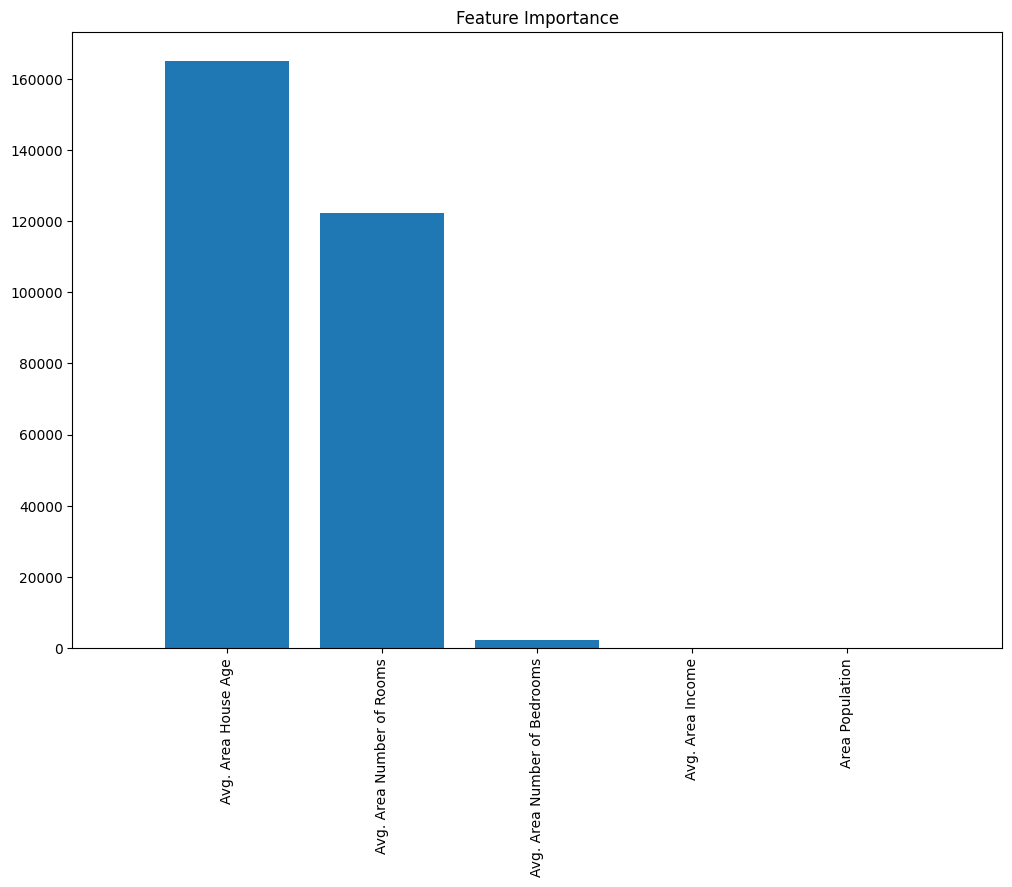

In [79]:
# analyse feature importance 
importances = lm.coef_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 8))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


Lasso Regression - Mean Squared Error: 10460958128.937366
Lasso Regression - R2 Score: 0.9176824070891668


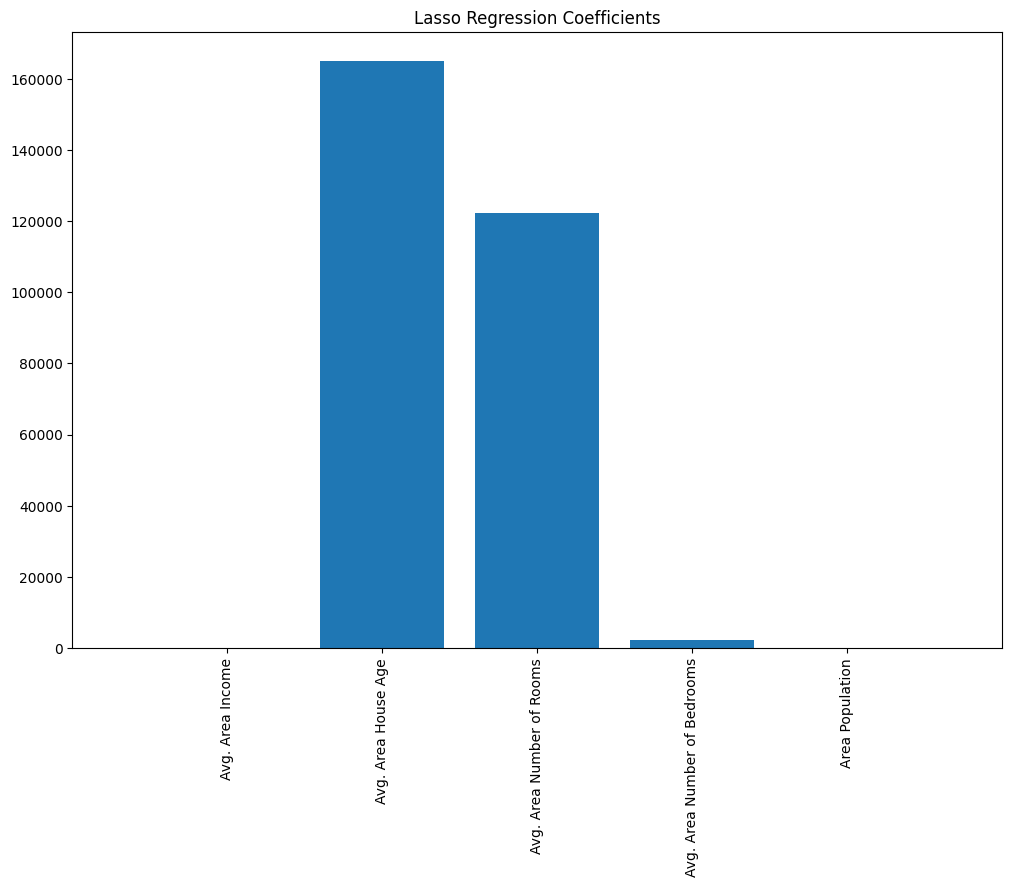

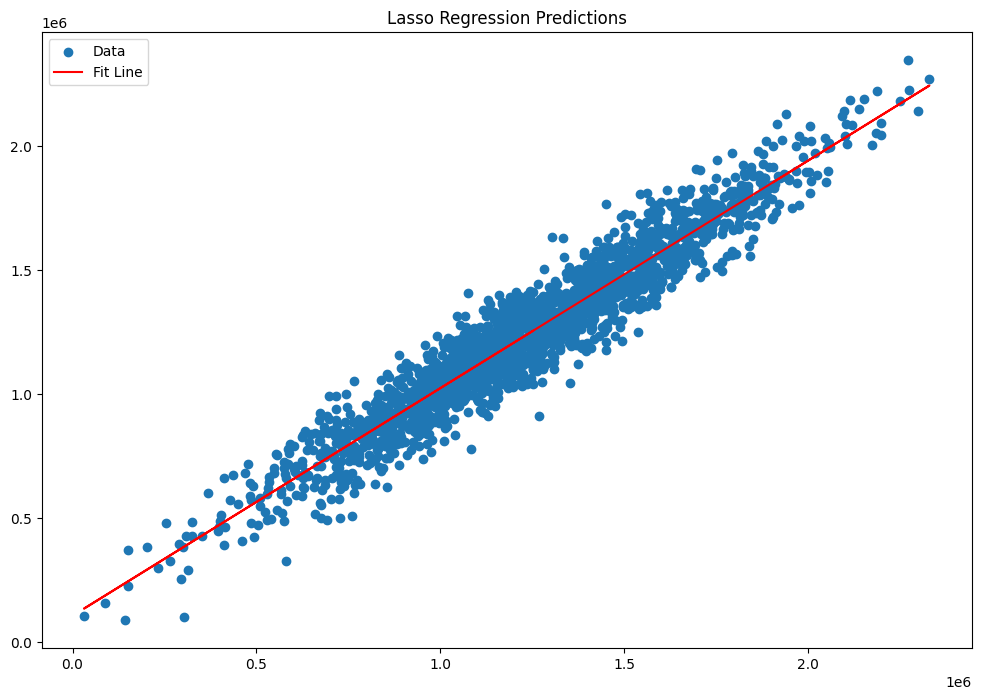

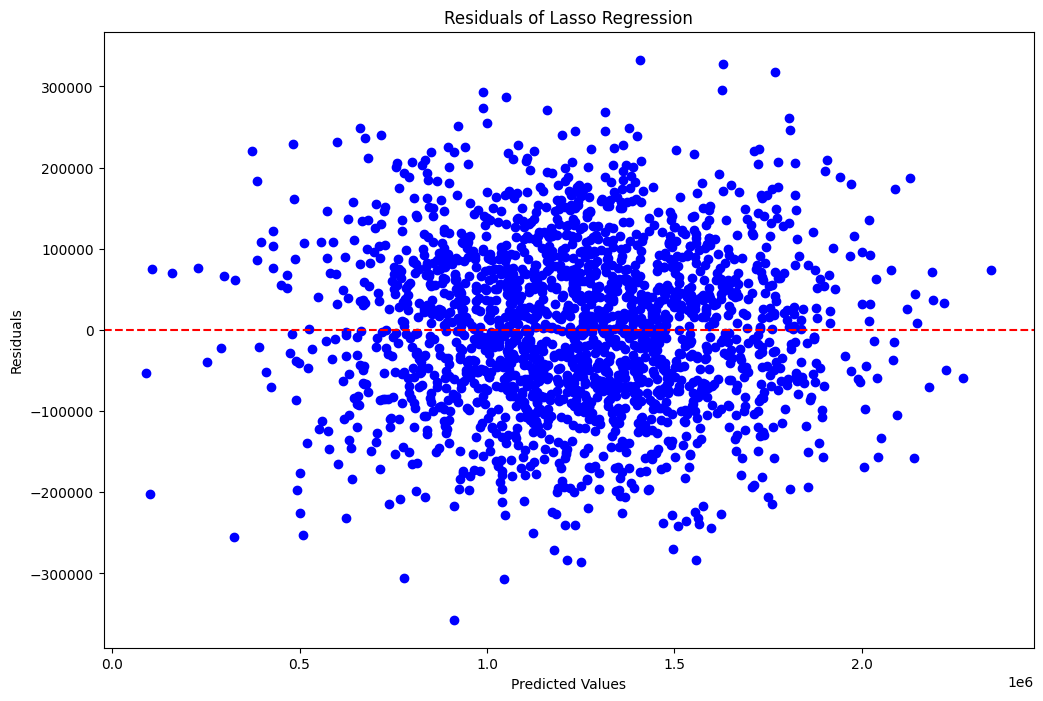

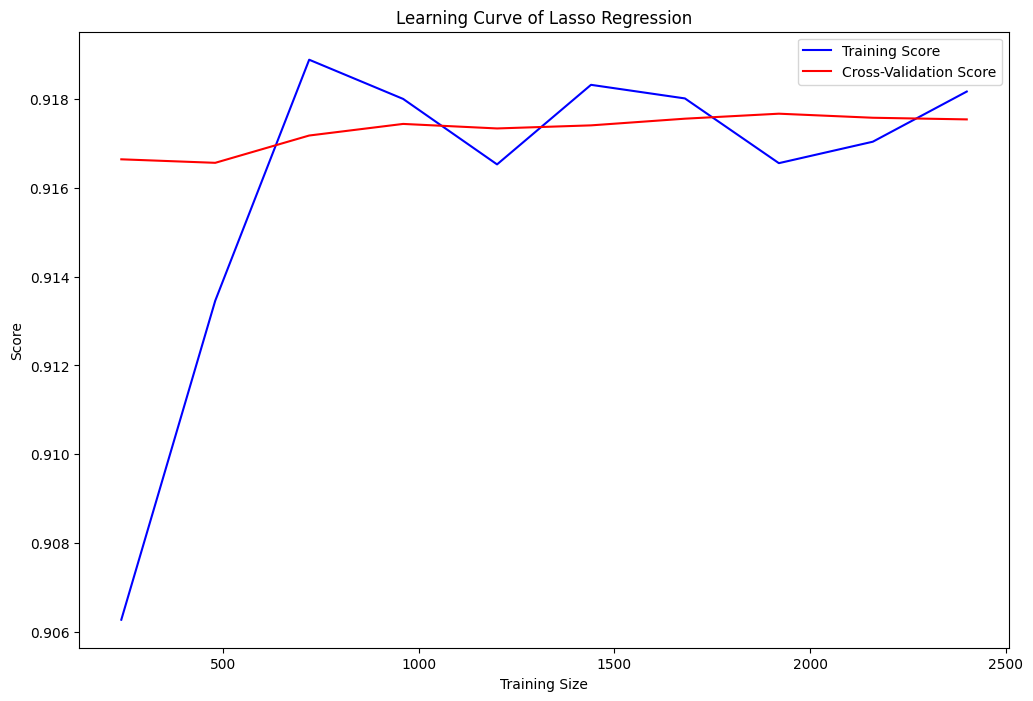

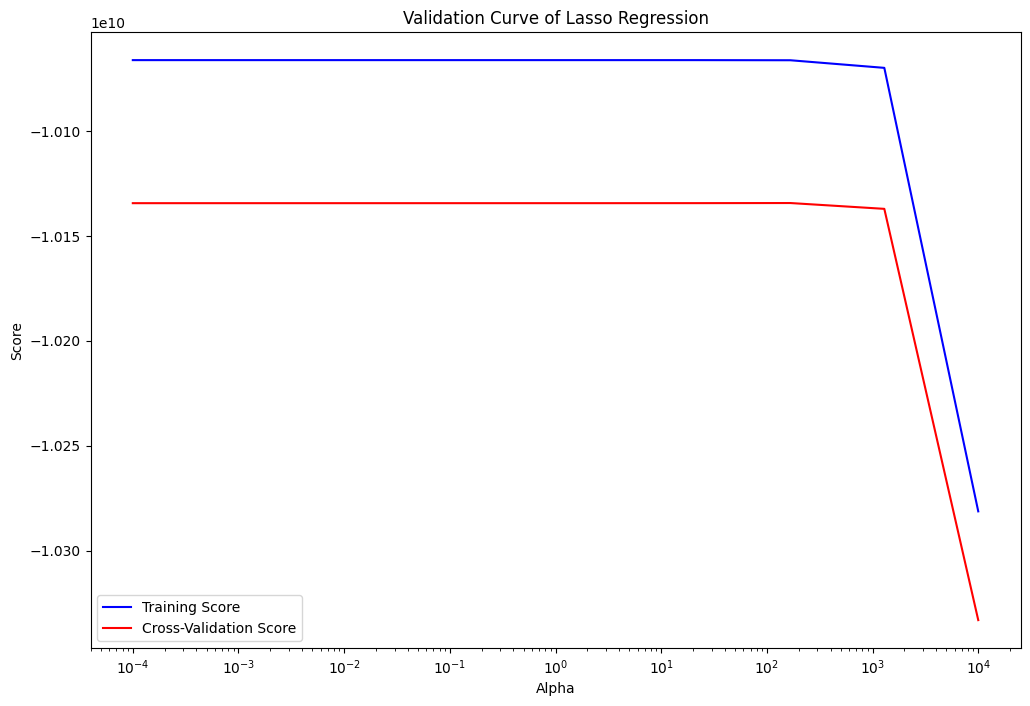

In [96]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit the Lasso regression model
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression - Mean Squared Error:", mse_lasso)
print("Lasso Regression - R2 Score:", r2_lasso)


# plot the coefficients
plt.figure(figsize=(12, 8))
plt.title("Lasso Regression Coefficients")
plt.bar(range(X.shape[1]), lasso_model.coef_, align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
# plot the predictions
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_lasso, label='Data')
m, b = np.polyfit(y_test, y_pred_lasso, 1)
plt.plot(y_test, m * y_test + b, color='red', label='Fit Line')
plt.legend()
plt.title('Lasso Regression Predictions')
plt.show()
# plot the residuals
plt.figure(figsize=(12, 8))
plt.scatter(y_pred_lasso, y_pred_lasso - y_test, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals of Lasso Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
# plot the learning curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(lasso_model, X_train, y_train, cv=5, n_jobs=-1,
                                                           train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(12, 8))
plt.title('Learning Curve of Lasso Regression')
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score', color='red')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()
# plot the validation curve
from sklearn.model_selection import validation_curve
param_range = np.logspace(-4, 4, 10)
train_scores, test_scores = validation_curve(lasso_model, X_train, y_train, param_name='alpha', param_range=param_range,
                                               cv=5, scoring='neg_mean_squared_error')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(12, 8))
plt.title('Validation Curve of Lasso Regression')
plt.plot(param_range, train_scores_mean, label='Training Score', color='blue')
plt.plot(param_range, test_scores_mean, label='Cross-Validation Score', color='red')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.legend()
plt.show()



Ridge Regression - Mean Squared Error: 10460818408.276558
Ridge Regression - R2 Score: 0.9176835065552325


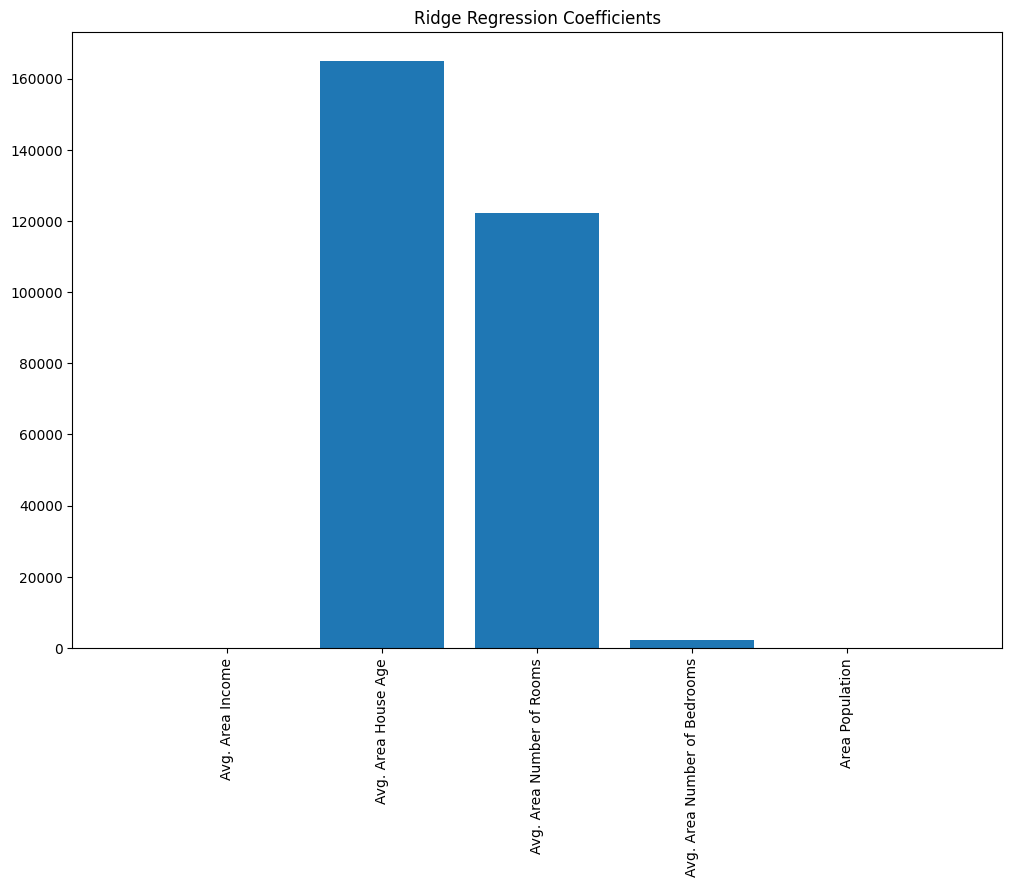

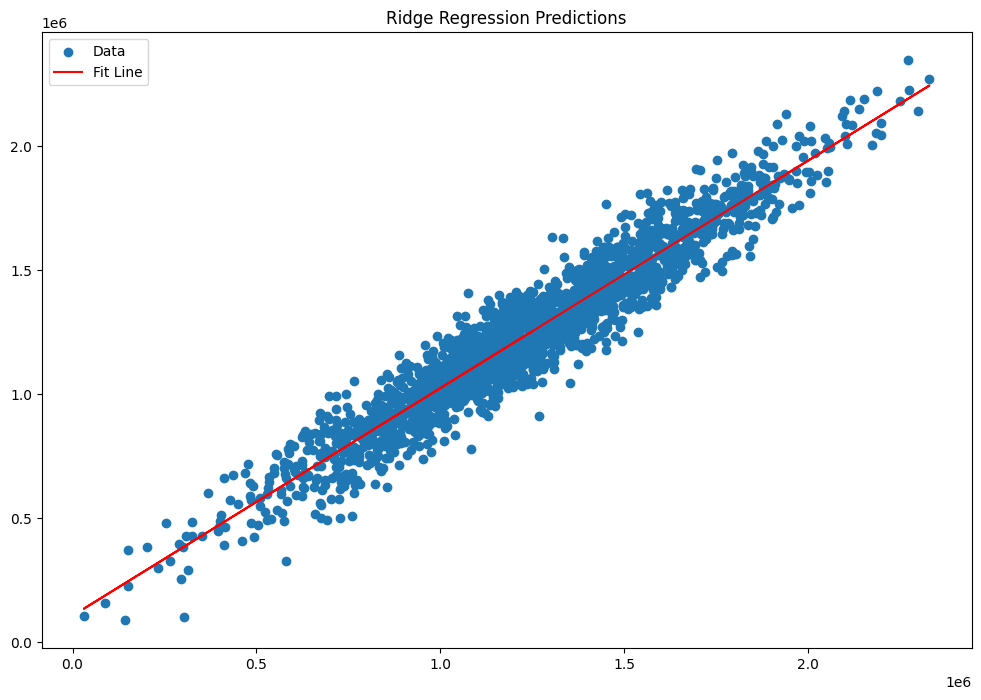

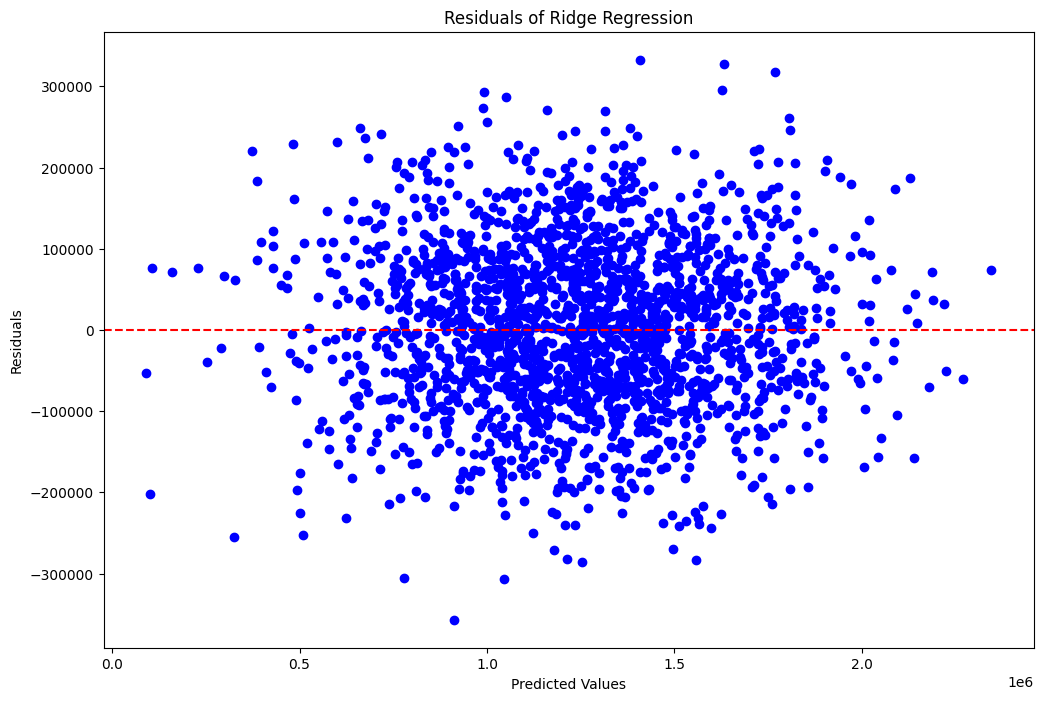

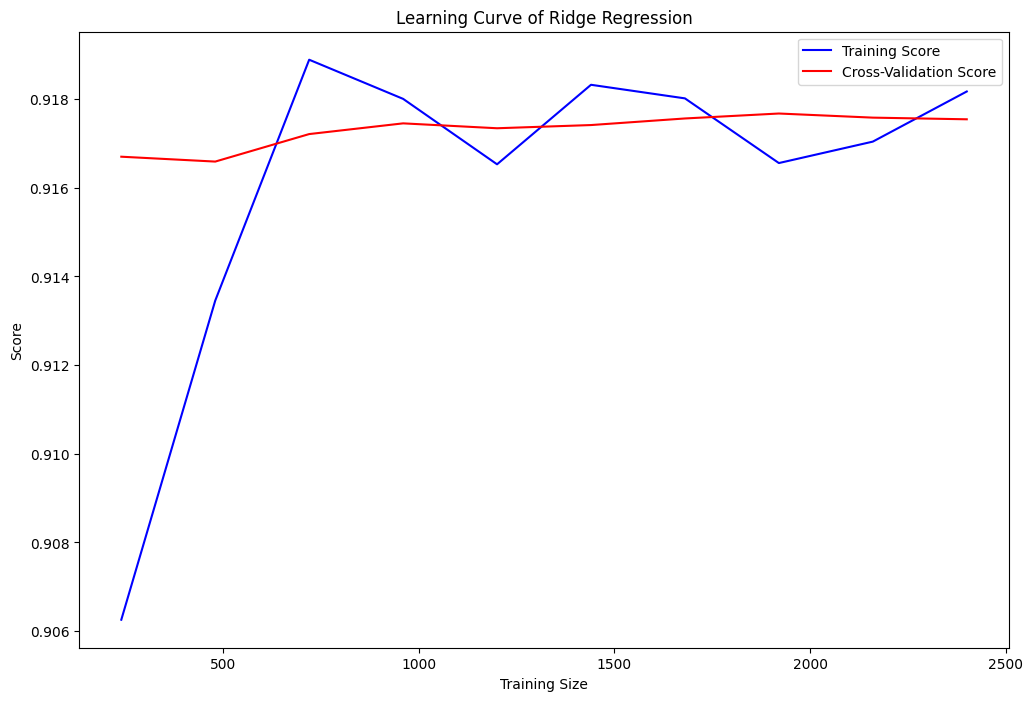

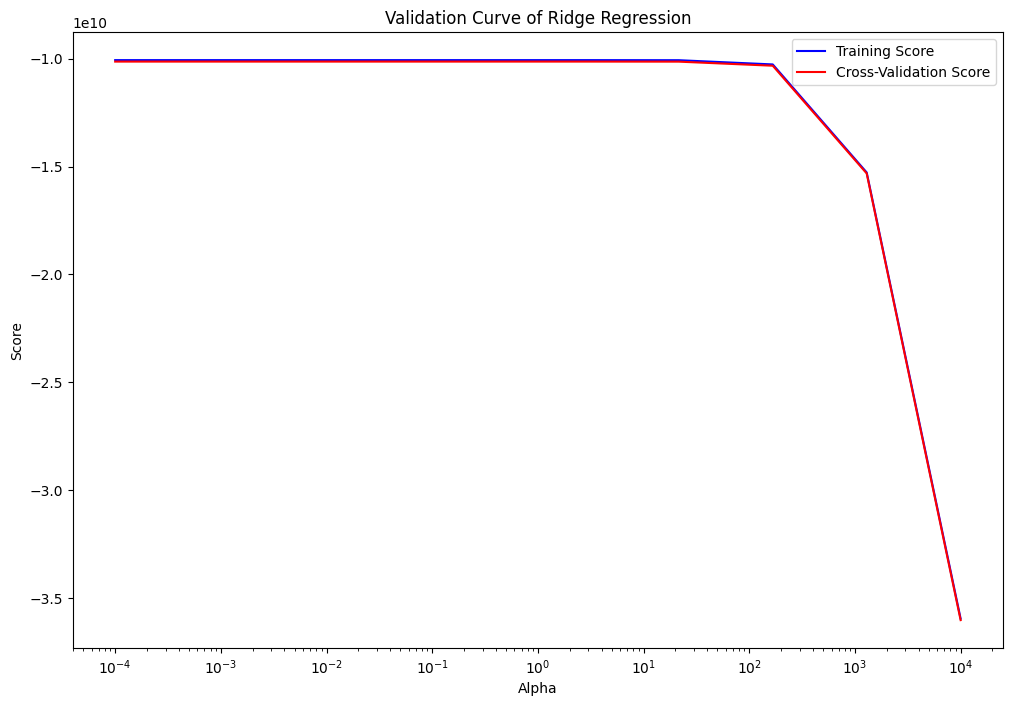

In [92]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

# Create and fit the Ridge regression model
ridge_model = Ridge(alpha=1, random_state=42)
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression - Mean Squared Error:", mse_ridge)
print("Ridge Regression - R2 Score:", r2_ridge)

# Plot the coefficients
plt.figure(figsize=(12, 8))
plt.title("Ridge Regression Coefficients")
plt.bar(range(X.shape[1]), ridge_model.coef_, align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Plot the predictions
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_ridge, label='Data')
m, b = np.polyfit(y_test, y_pred_ridge, 1)
plt.plot(y_test, m * y_test + b, color='red', label='Fit Line')
plt.legend()
plt.title('Ridge Regression Predictions')
plt.show()

# Plot the residuals
plt.figure(figsize=(12, 8))
plt.scatter(y_pred_ridge, y_pred_ridge - y_test, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals of Ridge Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(ridge_model, X_train, y_train, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(12, 8))
plt.title('Learning Curve of Ridge Regression')
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score', color='red')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()

# Plot the validation curve
param_range = np.logspace(-4, 4, 10)
train_scores, test_scores = validation_curve(ridge_model, X_train, y_train, param_name='alpha', param_range=param_range,
                                             cv=5, scoring='neg_mean_squared_error')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure(figsize=(12, 8))
plt.title('Validation Curve of Ridge Regression')
plt.plot(param_range, train_scores_mean, label='Training Score', color='blue')
plt.plot(param_range, test_scores_mean, label='Cross-Validation Score', color='red')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.legend()
plt.show()

In [83]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Ridge
ridge_params = {"alpha": [0.1, 1.0, 10.0, 100.0]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring="neg_mean_squared_error")
ridge_grid.fit(X_train, y_train)

print("Best Ridge Alpha:", ridge_grid.best_params_)

Best Ridge Alpha: {'alpha': 1.0}


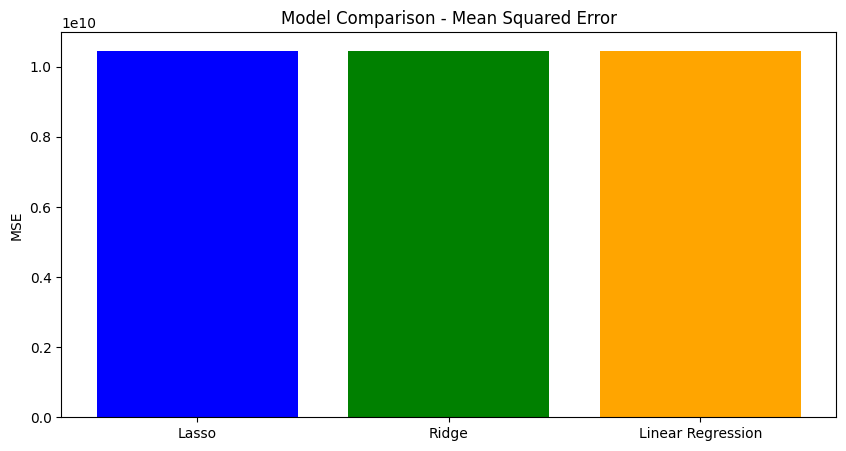

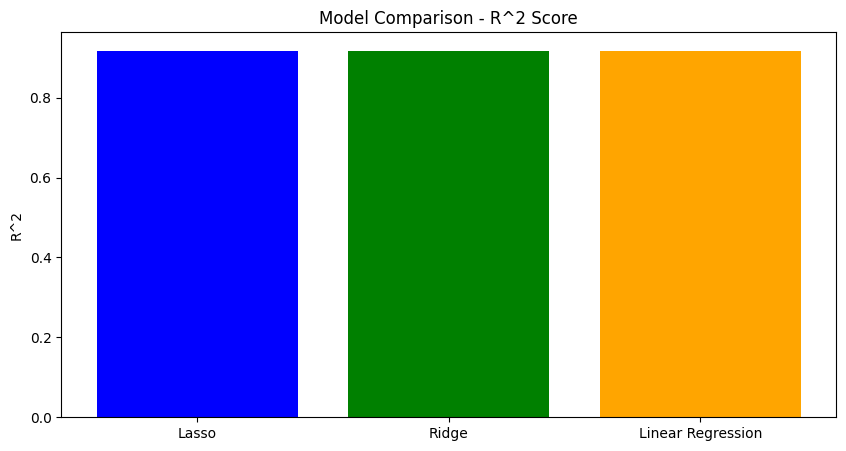

In [86]:
import matplotlib.pyplot as plt

# Data for visualization
models = ['Lasso', 'Ridge', 'Linear Regression']
mse_values = [mse_lasso, mse_ridge, metrics.mean_squared_error(y_test, predictions)]
r2_values = [r2_lasso, r2_ridge, r2]

# Plot MSE
plt.figure(figsize=(10, 5))
plt.bar(models, mse_values, color=["blue", "green", "orange"])
plt.title("Model Comparison - Mean Squared Error")
plt.ylabel("MSE")
plt.show()

# Plot R^2
plt.figure(figsize=(10, 5))
plt.bar(models, r2_values, color=["blue", "green", "orange"])
plt.title("Model Comparison - R^2 Score")
plt.ylabel("R^2")
plt.show()

In [93]:
# find the best model between these three models
best_model = None
best_score = float('-inf')
for model, score in zip(models, r2_values):
    if score > best_score:
        best_score = score
        best_model = model
print(f"The best model is {best_model} with a score of {best_score:.2f}")


The best model is Ridge with a score of 0.92


In [97]:
import torch
from sklearn.preprocessing import StandardScaler

import torch.nn as nn
import torch.optim as optim

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# Initialize the model, loss function, and optimizer
input_dim = X_train_tensor.shape[1]
model = LinearRegressionModel(input_dim)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    mse = criterion(y_pred_tensor, y_test_tensor).item()
    print(f'Mean Squared Error on Test Data: {mse:.4f}')

# Convert predictions back to numpy for further analysis
y_pred = y_pred_tensor.numpy()

Epoch [100/1000], Loss: 40180977664.0000
Epoch [200/1000], Loss: 10654310400.0000
Epoch [300/1000], Loss: 10089141248.0000
Epoch [400/1000], Loss: 10074005504.0000
Epoch [500/1000], Loss: 10073133056.0000
Epoch [600/1000], Loss: 10073047040.0000
Epoch [700/1000], Loss: 10073036800.0000
Epoch [800/1000], Loss: 10073036800.0000
Epoch [900/1000], Loss: 10073036800.0000
Epoch [1000/1000], Loss: 10073034752.0000
Mean Squared Error on Test Data: 10460931072.0000


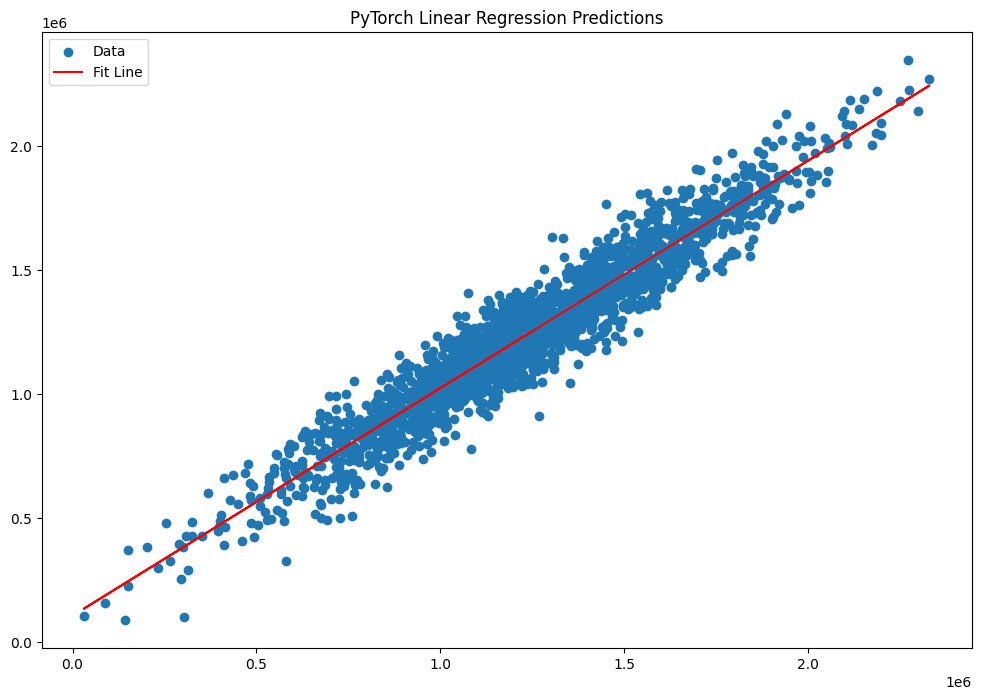

PyTorch Linear Regression Coefficients: [[227623.08   160615.12   121845.8      2753.5222 151227.84  ]]
PyTorch Linear Regression Intercept: [1228447.2]
R2 Score: 0.917682623036787


In [100]:
# show the predictions
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, label='Data')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m * y_test + b, color='red', label='Fit Line')
plt.legend()
plt.title('PyTorch Linear Regression Predictions')
plt.show()

print("PyTorch Linear Regression Coefficients:", model.linear.weight.data.numpy())
print("PyTorch Linear Regression Intercept:", model.linear.bias.data.numpy())

# r2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
